# IPL Win Predictor

## Data Gathering

In [1]:
# Importing required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the datsets
match_df = pd.read_csv("Datasets/matches1.csv")
delivery_df = pd.read_csv("Datasets/deliveries1.csv")

In [3]:
match_df.shape

(1095, 20)

In [4]:
delivery_df.shape

(260920, 17)

In [5]:
# match dataframe
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
# delivery dataframe
delivery_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


### Data Preprocessing

In [7]:
# Checking the runs c=scored in bth the innnings of each match an storing it in another dataframe
total_score_df = delivery_df.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()


In [8]:
# we just need the first inning total for our calculation
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [9]:
# Joining the dataframes
merge = match_df.merge(total_score_df[['match_id', 'total_runs']], left_on = 'id', right_on= 'match_id')

In [10]:
merge

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [11]:
merge['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
# Name of the teams fro the datasets that are playing till today
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [13]:
# Changing the name of the playing teams to their current names
merge['team1'] = merge['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge['team2'] = merge['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

merge['team1'] = merge['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge['team2'] = merge['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge['team1'] = merge['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge['team2'] = merge['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

In [14]:
# We only need the teams that are playing till current date, so we are dropping others
merge = merge[merge['team1'].isin(teams)]
merge = merge[merge['team2'].isin(teams)]

In [15]:
merge.shape

(965, 22)

In [18]:
# Matches that are affected by DLS method('0' means not affected, '1' means affected)
merge['method'].value_counts()

D/L    17
Name: method, dtype: int64

In [19]:
# We are keeping only those matches that are not affected by DLS
merge = merge[merge['method'] != 'D/L']
merge

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1426305,2024,Mumbai,2024-05-17,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Mumbai Indians,...,runs,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,1426305,214
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [20]:
# Taking only the required columns
merge = merge[['match_id', 'city', 'winner', 'total_runs']]
merge_df = merge.merge(delivery_df, on = 'match_id')

In [21]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,Bangalore,Kolkata Knight Riders,222,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227358,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
227359,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
227360,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
227361,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [22]:
merge_df = merge_df[merge_df['inning'] == 2]

In [23]:
merge_df.shape

(109998, 20)

In [24]:
# Result declare in form of 0 & 1
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [25]:
# Checking the null values from datset
print(merge_df.isnull().sum())



match_id                 0
city                  6012
winner                  27
total_runs_x             0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs_y             0
extras_type         104080
is_wicket                0
player_dismissed    104540
dismissal_kind      104540
fielder             106111
dtype: int64


In [26]:
# Filling the missing values in the city column with the mode of their records and the winner column with 'No result
merge_df = merge_df.assign(
    city = merge_df['city'].fillna(merge_df['city'].mode()[0]),
    winner = merge_df['winner'].fillna('No Result')
)

In [27]:
# Check Data Types of each column
print(merge_df.dtypes)



match_id             int64
city                object
winner              object
total_runs_x         int64
inning               int64
batting_team        object
bowling_team        object
over                 int64
ball                 int64
batter              object
bowler              object
non_striker         object
batsman_runs         int64
extra_runs           int64
total_runs_y         int64
extras_type         object
is_wicket            int64
player_dismissed    object
dismissal_kind      object
fielder             object
dtype: object


In [28]:
print(merge_df.isnull().sum())

match_id                 0
city                     0
winner                   0
total_runs_x             0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs_y             0
extras_type         104080
is_wicket                0
player_dismissed    104540
dismissal_kind      104540
fielder             106111
dtype: int64


In [29]:
# Check Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Daredevils'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Deccan Chargers' 'Mumbai Indians' 'Sunrisers Hyderabad' 'No Result'
 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans' 'Lucknow Super Giants']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Deccan Chargers' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Punjab Kings' 'Gujarat Titans' 'Lucknow Super Giants']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Punjab Kings' 'Lucknow Super Giants' 'Gujarat Titans']


In [30]:
# Replacing the name of the teams with their current names in the merged dataframe
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
merge_df['winner'] = merge_df['winner'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

merge_df['batting_team'] = merge_df['batting_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Delhi Daredevils', 'Delhi Capitals')
merge_df['winner'] = merge_df['winner'].str.replace('Delhi Daredevils', 'Delhi Capitals')



In [31]:
# After replacing checking Unique Values in Key Columns
print(merge_df['winner'].unique())
print(merge_df['batting_team'].unique())
print(merge_df['bowling_team'].unique())


['Kolkata Knight Riders' 'Chennai Super Kings' 'Delhi Capitals'
 'Royal Challengers Bangalore' 'Rajasthan Royals' 'Kings XI Punjab'
 'Sunrisers Hyderabad' 'Mumbai Indians' 'No Result' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants']
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants']
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Capitals' 'Punjab Kings'
 'Lucknow Super Giants' 'Gujarat Titans']


In [32]:
# One record was left in the previous changing i.e. 'Kingx XI Punjab' -> 'Punjab Kings'
merge_df['batting_team'] = merge_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
merge_df['bowling_team'] = merge_df['bowling_team'].str.replace('Kings XI Punjab', 'Punjab Kings')
merge_df['winner'] = merge_df['winner'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [33]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Sunrisers Hyderabad' 'Punjab Kings'
 'Gujarat Titans' 'Lucknow Super Giants']


In [34]:
# One of them giving errors due to spacing problems, that's why we used strip()
merge_df['batting_team'] = merge_df['batting_team'].str.strip()


In [35]:
merge_df['batting_team'] = merge_df['batting_team'].str.replace('Kings XI Punjab', 'Punjab Kings')


In [36]:
print(merge_df['batting_team'].unique())

['Royal Challengers Bangalore' 'Punjab Kings' 'Delhi Capitals'
 'Kolkata Knight Riders' 'Rajasthan Royals' 'Mumbai Indians'
 'Chennai Super Kings' 'Sunrisers Hyderabad' 'Gujarat Titans'
 'Lucknow Super Giants']


In [37]:
# We take the help of cumulative sum to calculate the total runs ball by ball
merge_df['current_score'] = merge_df.groupby(['match_id'])['total_runs_y'].cumsum()

In [38]:
# Since the target is 1 run more than the actual runs scored in the first innings
merge_df['runs_left'] = (merge_df['total_runs_x'] - merge_df['current_score']) + 1

In [39]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,1,222
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,1,wides,0,NaN,NaN,NaN,2,221
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,0,NaN,0,NaN,NaN,NaN,2,221
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,0,1,NaN,0,NaN,NaN,NaN,3,220
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,0,1,NaN,0,NaN,NaN,NaN,4,219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227358,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,110,4
227359,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,111,3
227360,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,112,2
227361,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,0,1,NaN,0,NaN,NaN,NaN,113,1


In [40]:
print(merge_df['over'].max())


19


In [42]:
# Calculating balls left after each ball
merge_df['balls_left'] = 120 - (merge_df['over']*6 + merge_df['ball'])

In [116]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,current_score,runs_left,balls_left,wickets,wickets_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,1,222,119,10,9,6.000000,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,2,221,118,10,8,6.000000,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,1,2,221,117,10,7,4.000000,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,3,220,116,10,6,4.500000,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,4,219,115,10,5,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227358,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,110,4,61,8,0,11.186441,0.393443,1
227359,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,111,3,60,8,0,11.100000,0.300000,1
227360,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,112,2,59,8,0,11.016393,0.203390,1
227361,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,113,1,58,8,0,10.935484,0.103448,1


In [117]:
# Filling the null values in the player dismised column with 0 and calculating the newly addded wickets columm using it
merge_df['player_dismissed'] = merge_df['player_dismissed'].fillna("0")
merge_df['player_dismissed'] = merge_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
merge_df['player_dismissed'] = merge_df['player_dismissed'].astype('int')
wickets = merge_df.groupby('match_id')['player_dismissed'].cumsum()
merge_df['wickets'] = 10 - wickets
merge_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,current_score,runs_left,balls_left,wickets,wickets_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,1,222,119,9,9,6.0,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,2,221,118,8,8,6.0,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,1,2,221,117,7,7,4.0,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,3,220,116,6,6,4.5,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,4,219,115,5,5,4.8,11.426087,0


In [118]:
# Current run rate(CRR)
merge_df['crr'] = (merge_df['current_score']*6)/(120 - merge_df['balls_left'])

In [119]:
#Required run rate(RRR)
merge_df['rrr'] = (merge_df['runs_left']*6)/merge_df['balls_left']

In [120]:
merge_df['rrr'] = merge_df['rrr'].apply(lambda x: max(x, 0))


In [121]:
merge_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,is_wicket,player_dismissed,current_score,runs_left,balls_left,wickets,wickets_left,crr,rrr,result
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,1,222,119,9,9,6.000000,11.193277,0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,0,1,2,221,118,8,8,6.000000,11.237288,0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,1,2,221,117,7,7,4.000000,11.333333,0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,3,220,116,6,6,4.500000,11.379310,0
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,4,219,115,5,5,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227358,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,110,4,61,-53,0,11.186441,0.393443,1
227359,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,111,3,60,-54,0,11.100000,0.300000,1
227360,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,112,2,59,-55,0,11.016393,0.203390,1
227361,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,113,1,58,-56,0,10.935484,0.103448,1


In [137]:
# merge_df['wickets'] = merge_df['wickets'].apply(lambda x: max(x, 0))

In [138]:
# Checking after filling the missing values
print(merge_df.isnull().sum())


match_id             0
city                 0
winner               0
total_runs_x         0
inning               0
batting_team         0
bowling_team         0
over                 0
ball                 0
batter               0
bowler               0
non_striker          0
batsman_runs         0
extra_runs           0
total_runs_y         0
is_wicket            0
player_dismissed     0
current_score        0
runs_left            0
balls_left           0
wickets              0
crr                  0
rrr                 16
result               0
dtype: int64


In [139]:
# Deleting the unnecessary columns
merge_df  = merge_df.drop(columns = ['wickets_left'])

KeyError: "['wickets_left'] not found in axis"

In [140]:
# Applying modified result column-wise to the dataframe
merge_df['result'] = merge_df.apply(result,axis=1)

In [141]:
# Again checking if there are some null values or not
print(merge_df.isnull().sum())

match_id             0
city                 0
winner               0
total_runs_x         0
inning               0
batting_team         0
bowling_team         0
over                 0
ball                 0
batter               0
bowler               0
non_striker          0
batsman_runs         0
extra_runs           0
total_runs_y         0
is_wicket            0
player_dismissed     0
current_score        0
runs_left            0
balls_left           0
wickets              0
crr                  0
rrr                 16
result               0
dtype: int64


In [142]:
# Checking the first 5 rows
print(merge_df.head())


     match_id       city                 winner  total_runs_x  inning  \
124    335982  Bangalore  Kolkata Knight Riders           222       2   
125    335982  Bangalore  Kolkata Knight Riders           222       2   
126    335982  Bangalore  Kolkata Knight Riders           222       2   
127    335982  Bangalore  Kolkata Knight Riders           222       2   
128    335982  Bangalore  Kolkata Knight Riders           222       2   

                    batting_team           bowling_team  over  ball    batter  \
124  Royal Challengers Bangalore  Kolkata Knight Riders     0     1  R Dravid   
125  Royal Challengers Bangalore  Kolkata Knight Riders     0     2  W Jaffer   
126  Royal Challengers Bangalore  Kolkata Knight Riders     0     3  W Jaffer   
127  Royal Challengers Bangalore  Kolkata Knight Riders     0     4  W Jaffer   
128  Royal Challengers Bangalore  Kolkata Knight Riders     0     5  R Dravid   

     ... total_runs_y is_wicket  player_dismissed  current_score  runs_lef

In [143]:
# Saving the cleaned datset into a new dataset
merge_df.to_csv('Datasets/final_dataset_2024.csv', index=False)


In [144]:
# Creating a new dataframe with all the necessary features extracted from the previous dataframe
final_df = merge_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]


In [145]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,9,222,6.000000,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,8,222,6.000000,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,7,222,4.000000,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,6,222,4.500000,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,5,222,4.800000,11.426087,0
...,...,...,...,...,...,...,...,...,...,...
227358,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,4,61,0,113,11.186441,0.393443,1
227359,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,3,60,0,113,11.100000,0.300000,1
227360,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,2,59,0,113,11.016393,0.203390,1
227361,Kolkata Knight Riders,Sunrisers Hyderabad,Chennai,1,58,0,113,10.935484,0.103448,1


In [146]:
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,222,119,9,222,6.0,11.193277,0
125,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,118,8,222,6.0,11.237288,0
126,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,221,117,7,222,4.0,11.333333,0
127,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,220,116,6,222,4.5,11.379310,0
128,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,219,115,5,222,4.8,11.426087,0


In [147]:
# Suffling to check if everything is fine
final_df = final_df.sample(final_df.shape[0])


In [148]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
188630,Punjab Kings,Lucknow Super Giants,Pune,112,85,0,153,7.200000,7.905882,0
117244,Delhi Capitals,Sunrisers Hyderabad,Hyderabad,186,113,3,191,5.142857,9.876106,0
45245,Royal Challengers Bangalore,Delhi Capitals,Delhi,99,88,0,160,11.625000,6.750000,1
196940,Delhi Capitals,Lucknow Super Giants,Lucknow,55,6,0,193,7.315789,55.000000,0
23745,Sunrisers Hyderabad,Punjab Kings,Johannesburg,101,95,0,134,8.160000,6.378947,0
...,...,...,...,...,...,...,...,...,...,...
61722,Punjab Kings,Sunrisers Hyderabad,Chandigarh,184,109,0,190,3.818182,10.128440,1
5000,Kolkata Knight Riders,Punjab Kings,Chandigarh,10,0,0,178,8.450000,inf,0
81165,Punjab Kings,Rajasthan Royals,Mumbai,126,64,0,191,7.071429,11.812500,1
62696,Mumbai Indians,Kolkata Knight Riders,Mumbai,141,119,9,140,0.000000,7.109244,0


In [149]:
final_df['batting_team'].unique()

array(['Punjab Kings', 'Delhi Capitals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Gujarat Titans', 'Chennai Super Kings',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Lucknow Super Giants'], dtype=object)

In [150]:
# final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')

In [151]:
final_df['bowling_team'].unique()

array(['Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Punjab Kings', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Titans'], dtype=object)

In [152]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
149038,Delhi Capitals,Sunrisers Hyderabad,Visakhapatnam,52,32,0,162,7.568182,9.75,1


# EDA ( Exploratory Data Analysis)


In [153]:
# final_df['batting_team'] = final_df['batting_team'].str.replace('King XI Punjab', 'Punjab Kings')
final_df['batting_team'].unique()

array(['Punjab Kings', 'Delhi Capitals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Gujarat Titans', 'Chennai Super Kings',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Lucknow Super Giants'], dtype=object)

In [154]:
final_df['bowling_team'].unique()


array(['Lucknow Super Giants', 'Sunrisers Hyderabad', 'Delhi Capitals',
       'Punjab Kings', 'Chennai Super Kings', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Titans'], dtype=object)

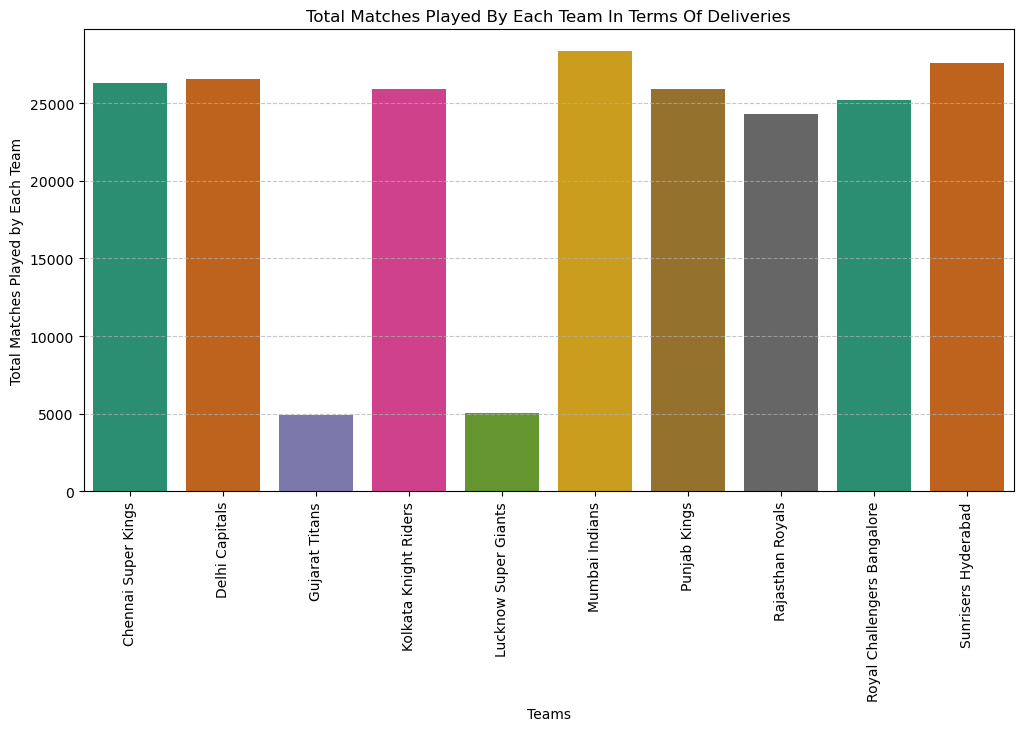

In [155]:
# We are using matplotlib and seaborn library for data visualization with different graphs and charts
# Total Matches Played by Each Team

team_matches = final_df['batting_team'].value_counts() + final_df['bowling_team'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = team_matches.index, y = team_matches.values, palette = 'Dark2')
plt.xticks(rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Total Matches Played by Each Team")
plt.title("Total Matches Played By Each Team In Terms Of Deliveries")
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.savefig("Deliveries.jpg")
plt.show()





#### Mumbai Indians played the highest number of matches in terms of deliveries and both Gujrat Titans and Lucknow Super Giants played the lowest since they are introduced from year 2022.

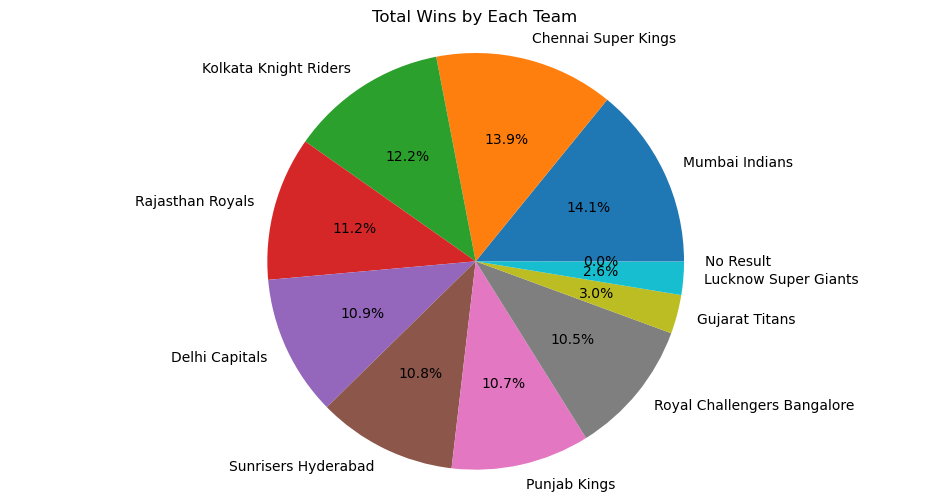

In [156]:
# Total number of wins by each team
winner_counts = merge_df['winner'].value_counts()
plt.figure(figsize = (12,6))
plt.pie(winner_counts, labels = winner_counts.index, autopct='%1.1f%%')
plt.title("Total Wins by Each Team")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.savefig("pie.jpg")
plt.show()



#### We can see that Mumbai Indians has the highest winning percentage and Lucknow Super Giants has the lowest one(Excluding No Result).

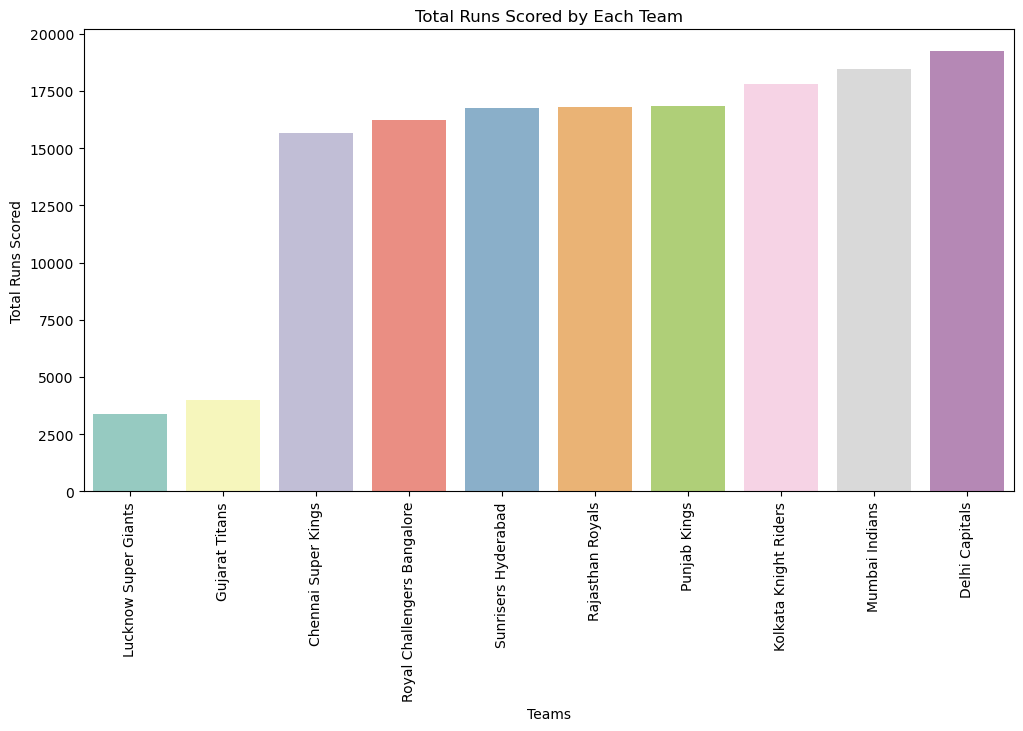

In [193]:
# Total runs scored by each team
team_total_runs = merge_df.groupby('batting_team')['total_runs_y'].sum().sort_values()
plt.figure(figsize=(12,6))
sns.barplot(x = team_total_runs.index, y = team_total_runs.values, palette = 'Set3')
plt.xticks(rotation=90)
plt.xlabel("Teams")
plt.ylabel("Total Runs Scored")
plt.title("Total Runs Scored by Each Team")
# plt.savefig("runs.jpg")
plt.show()


#### Delhi Capitals scored the highest number of runs over the years upto 2024 and Lucknow Super Giants scored the less amount of runs comapred to other teams.

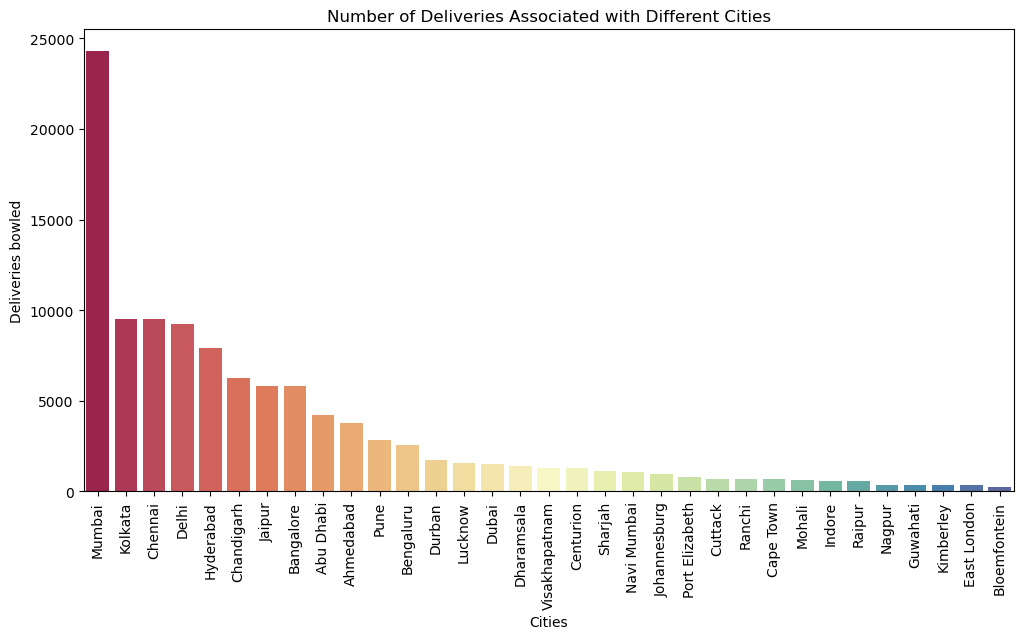

In [158]:
# Matches played in different cities
city_matches = merge_df['city'].value_counts()
plt.figure(figsize = (12,6))
sns.barplot(x = city_matches.index, y=city_matches.values, palette = 'Spectral')
plt.xticks(rotation = 90)
plt.xlabel("Cities")
plt.ylabel("Deliveries bowled")
plt.title("Number of Deliveries Associated with Different Cities")
# plt.savefig("cities.jpg")
plt.show()


#### We can see that the most number of deliveries bowled in the city of Mumbai and the least number of deliveries bowled in Bloemfontein.

In [160]:
# Compute 5-number summary for each numeric column
summary =final_df[['total_runs_x','wickets','crr','rrr']].describe(percentiles=[0.25, 0.5, 0.75]).loc[['min', '25%', '50%', '75%', 'max']]

print(summary)

     total_runs_x  wickets        crr        rrr
min          62.0      0.0   0.000000   0.000000
25%         149.0      0.0   6.375000   7.333333
50%         168.0      0.0   7.584906   9.092784
75%         188.0      0.0   8.808511  11.351351
max         277.0      9.0  36.000000        inf


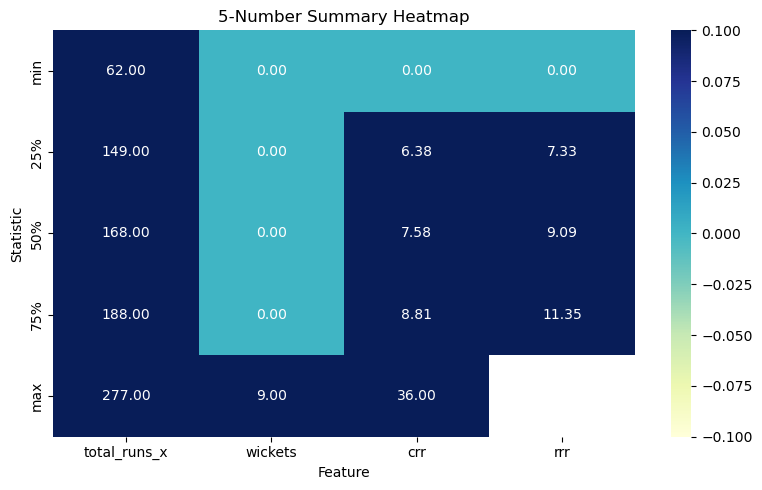

In [161]:
plt.figure(figsize=(8, 5))
sns.heatmap(summary, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('5-Number Summary Heatmap')
plt.ylabel('Statistic')
plt.xlabel('Feature')
plt.tight_layout()
# plt.savefig("5 number summary.jpg")
plt.show()

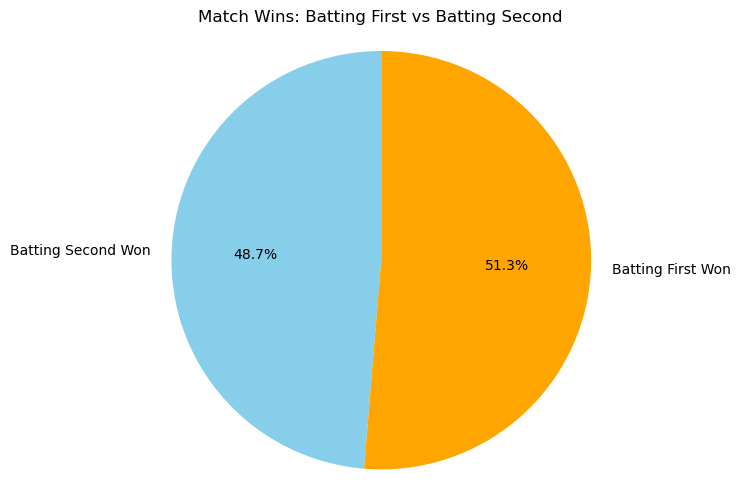

In [162]:
wins = merge_df['result'].value_counts()
# Map results to labels
labels = ['Batting Second Won', 'Batting First Won']
sizes = [wins.get(0, 0), wins.get(1, 0)]

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
plt.title('Match Wins: Batting First vs Batting Second')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular.
# plt.savefig("batting 1st or 2nd.jpg")
plt.show()

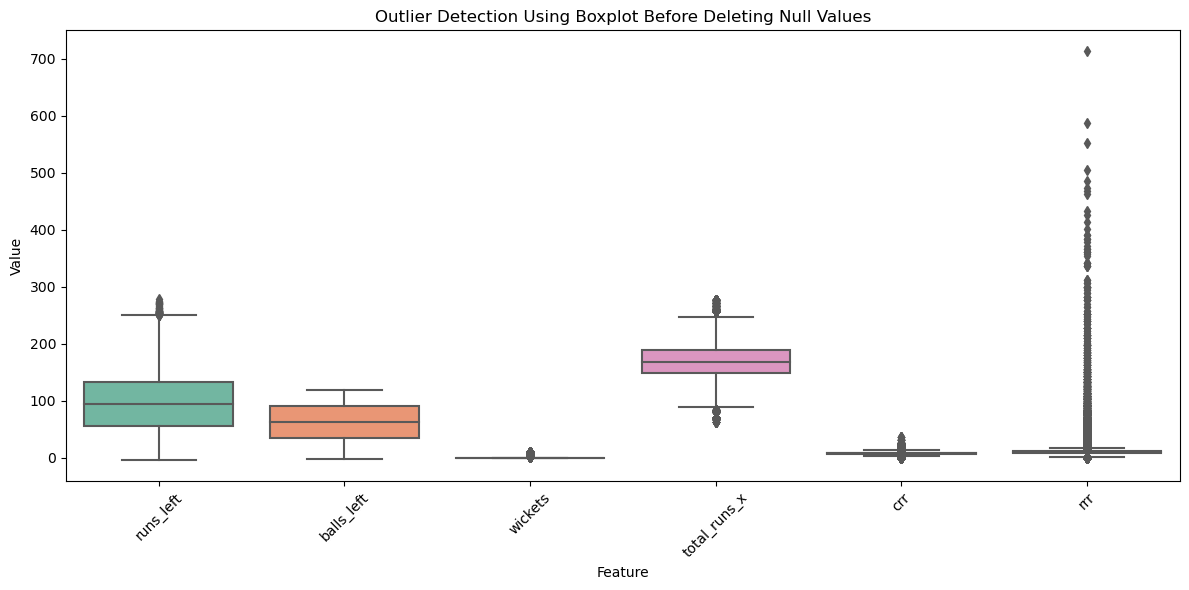

In [165]:
final_df

# Choose relevant numeric columns to inspect for outliers
numeric_cols = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']

# Plot boxplots for each column to show outliers
plt.figure(figsize=(12, 6))
final_df_melted = final_df[numeric_cols].melt(var_name='Feature', value_name='Value')
sns.boxplot(data=final_df_melted, x='Feature', y='Value', palette='Set2')
plt.title('Outlier Detection Using Boxplot Before Deleting Null Values')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("outlier before.jpg")
plt.show()

In [166]:
# If 0 number of balls is left in a match, then it means the winner is already decide. So we drop the records where no balls left in a match
final_df = final_df[final_df['balls_left'] != 0]

In [167]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Define features and target
X = final_df.drop('result', axis=1) # features
y = final_df['result'] # target

# Train/test split (80% training data and 20% testing data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns
categorical_features = ['batting_team', 'bowling_team', 'city']
numeric_features = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']


In [168]:
# Train dataset
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
80943,Delhi Capitals,Kolkata Knight Riders,Mumbai,66,44,0,166,7.973684,9.000000
212413,Delhi Capitals,Chennai Super Kings,Delhi,78,2,0,223,7.423729,234.000000
29075,Punjab Kings,Sunrisers Hyderabad,Cuttack,153,92,0,170,3.857143,9.978261
114102,Kolkata Knight Riders,Sunrisers Hyderabad,Delhi,123,92,0,162,8.571429,8.021739
85180,Royal Challengers Bangalore,Sunrisers Hyderabad,Bangalore,97,59,0,155,5.803279,9.864407
...,...,...,...,...,...,...,...,...,...
102590,Punjab Kings,Royal Challengers Bangalore,Bangalore,208,103,0,226,6.705882,12.116505
26925,Delhi Capitals,Punjab Kings,Chandigarh,133,109,0,142,5.454545,7.321101
9087,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,90,16,0,197,6.230769,33.750000
225967,Lucknow Super Giants,Delhi Capitals,Delhi,28,11,0,208,9.963303,15.272727


In [169]:
# Column transformer
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('trf', OneHotEncoder(drop='first'), categorical_features),
    ('scaler', StandardScaler(), numeric_features)
])


In [170]:
final_df.dropna(inplace=True)

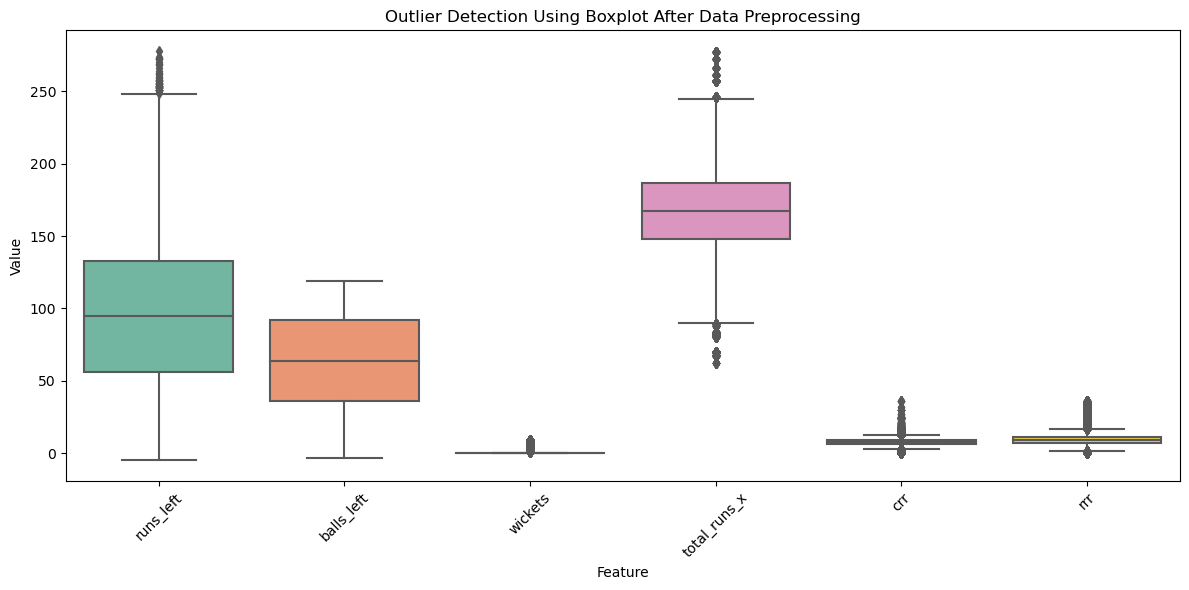

In [171]:
final_df = final_df[final_df['rrr'] <= 36]
# Choose relevant numeric columns to inspect for outliers
numeric_cols = ['runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr']

# Plot boxplots for each column to show outliers
plt.figure(figsize=(12, 6))
final_df_melted = final_df[numeric_cols].melt(var_name='Feature', value_name='Value')
sns.boxplot(data=final_df_melted, x='Feature', y='Value', palette='Set2')
plt.title('Outlier Detection Using Boxplot After Data Preprocessing')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig("outlier after.jpg")
plt.show()

# Model Training 

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline



### Logistic Regression


In [173]:
# Create a pipeline with logistic regression
log_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

log_pipe.fit(X_train, y_train)

y_pred_log = log_pipe.predict(X_test)


In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

print("Classification Report:\n")
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cm)

Logistic Regression Accuracy: 0.79564840578388
Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     10689
           1       0.79      0.81      0.80     11234

    accuracy                           0.80     21923
   macro avg       0.80      0.80      0.80     21923
weighted avg       0.80      0.80      0.80     21923

Confusion Matrix:
 [[8311 2378]
 [2102 9132]]


### Random Forest Classifier


In [175]:
random_pipe = Pipeline(steps=[
    ('step1',preprocessor),
    ('step2',RandomForestClassifier())
])

random_pipe.fit(X_train,y_train)
y_pred_random = random_pipe.predict(X_test)


In [176]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_random))
print("\nClassification Report:\n", classification_report(y_test, y_pred_random))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_random))


Random Forest Accuracy: 0.996624549559823

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10689
           1       1.00      1.00      1.00     11234

    accuracy                           1.00     21923
   macro avg       1.00      1.00      1.00     21923
weighted avg       1.00      1.00      1.00     21923


Confusion Matrix:
 [[10658    31]
 [   43 11191]]


### XGBoost Classifier(Extreme Gradient Boosting)

In [177]:
# !pip install xgboost


In [178]:
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

xgb_pipe = Pipeline(steps=[
    ('step1', preprocessor), 
    ('step2', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])
xgb_pipe.fit(X_train, y_train)

y_pred_xgb = xgb_pipe.predict(X_test)


C:\Users\iconi\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [11:36:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [179]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9883683802399307

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     10689
           1       0.99      0.99      0.99     11234

    accuracy                           0.99     21923
   macro avg       0.99      0.99      0.99     21923
weighted avg       0.99      0.99      0.99     21923


Confusion Matrix:
 [[10551   138]
 [  117 11117]]


### AdaBoost Classifier(Adaptive Boosting)

In [180]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create AdaBoost model with DecisionTreeClassifier as the base estimator
ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

ada_pipe = Pipeline(steps=[
    ('step1', preprocessor),        
    ('step2', ada_model)   
])

ada_pipe.fit(X_train, y_train)
y_pred_ada = ada_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ada))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_ada))


Accuracy: 0.7689184874332893

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76     10689
           1       0.76      0.79      0.78     11234

    accuracy                           0.77     21923
   macro avg       0.77      0.77      0.77     21923
weighted avg       0.77      0.77      0.77     21923


Confusion Matrix:
 [[7944 2745]
 [2321 8913]]


### SVM(Support Vector Machine)

In [182]:
from sklearn.svm import SVC

# Pipeline
svc_pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

# Train
svc_pipe.fit(X_train, y_train)

# Predict and evaluate
y_pred_svc = svc_pipe.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("SVC Classifier Report:\n")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

Accuracy: 0.9305751950006842
SVC Classifier Report:

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     10689
           1       0.93      0.93      0.93     11234

    accuracy                           0.93     21923
   macro avg       0.93      0.93      0.93     21923
weighted avg       0.93      0.93      0.93     21923

Confusion Matrix:
 [[ 9911   778]
 [  744 10490]]


# Performance Evaluation

## Precision, Recall & F1-Score
Precision (aka **positive predictive value**) and Recall (aka **sensitivity**) are measurements used both for analysis and calculation of the more holistic F1 score. - Precision is "how useful the results are", and - Recall is "how complete the results are".

    Higher values are better for precision, recall and F1 and they range from 0 to 1.

**F1 is a measure of accuracy that takes into account both false positives and false negatives.**

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$


$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

$$
F_1 = \left( \frac{1}{2} \left( \frac{1}{\text{recall}} + \frac{1}{\text{precision}} \right) \right)^{-1} = \frac{2 \cdot \text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
$$



In [188]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Accuracy
print(f"Logistic Regression: {accuracy_score(y_test,y_pred_log)}")
print(f"Random Forest Classifier: {accuracy_score(y_test,y_pred_random)}")
print(f"AdaBoost Claasifer: {accuracy_score(y_test,y_pred_ada)}")
print(f"XGBoost Classifer: {accuracy_score(y_test,y_pred_xgb)}")
print(f"Support Vector Machine: {accuracy_score(y_test,y_pred_svc)}")

Logistic Regression: 0.79564840578388
Random Forest Classifier: 0.996624549559823
AdaBoost Claasifer: 0.7689184874332893
XGBoost Classifer: 0.9883683802399307
Support Vector Machine: 0.9305751950006842


In [189]:
# Precision
print(f"Logistic Regression: {precision_score(y_test, y_pred_log)}")
print(f"Random Forest Classifer: {precision_score(y_test, y_pred_random)}")
print(f"AdaBoost Classifier: {precision_score(y_test, y_pred_ada)}")
print(f"XGBoost Classifier: {precision_score(y_test, y_pred_xgb)}")
print(f"Support Vector Machine: {precision_score(y_test, y_pred_svc)}")


Logistic Regression: 0.7933970460469157
Random Forest Classifer: 0.9972375690607734
AdaBoost Classifier: 0.7645393721049922
XGBoost Classifier: 0.9877387827632164
Support Vector Machine: 0.9309549165779197


In [190]:
# Recall
print(f"Logistic Regression: {recall_score(y_test, y_pred_log)}")
print(f"Random Forest Classifer: {recall_score(y_test, y_pred_random)}")
print(f"AdaBoost Classifier: {recall_score(y_test, y_pred_ada)}")
print(f"XGBoost Classifier: {recall_score(y_test, y_pred_xgb)}")
print(f"Support Vector Machine: {recall_score(y_test, y_pred_svc)}")

Logistic Regression: 0.8128894427630408
Random Forest Classifer: 0.9961723339861136
AdaBoost Classifier: 0.7933950507388285
XGBoost Classifier: 0.9895851878226811
Support Vector Machine: 0.9337724764108954


In [191]:
# F1 Score
print(f"Logistic Regression: {f1_score(y_test, y_pred_log)}")
print(f"Random Forest Classifer: {f1_score(y_test, y_pred_random)}")
print(f"AdaBoost Classifier: {f1_score(y_test, y_pred_ada)}")
print(f"XGBoost Classifier: {f1_score(y_test, y_pred_xgb)}")
print(f"Support Vector Machine: {f1_score(y_test, y_pred_svc)}")

Logistic Regression: 0.8030249736194162
Random Forest Classifer: 0.9967046669041681
AdaBoost Classifier: 0.7786999825266469
XGBoost Classifier: 0.9886611232157944
Support Vector Machine: 0.9323615678606346


In [194]:
# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, y_pred_log)
print(f"Logistic Regression:\n {confusion_matrix(y_test, y_pred_log)}")

random_cm = confusion_matrix(y_test, y_pred_random)
print(f"Random Forest Classifer:\n {confusion_matrix(y_test, y_pred_random)}")

ada_cm = confusion_matrix(y_test, y_pred_ada)
print(f"AdaBoost Classifier:\n {confusion_matrix(y_test, y_pred_ada)}")

xgb_cm = confusion_matrix(y_test, y_pred_xgb)
print(f"XGBoost Classifier:\n {confusion_matrix(y_test, y_pred_xgb)}")

svc_cm = confusion_matrix(y_test, y_pred_svc)
print(f"Support Vector Machine:\n {confusion_matrix(y_test, y_pred_svc)}")

Logistic Regression:
 [[8311 2378]
 [2102 9132]]
Random Forest Classifer:
 [[10658    31]
 [   43 11191]]
AdaBoost Classifier:
 [[7944 2745]
 [2321 8913]]
XGBoost Classifier:
 [[10551   138]
 [  117 11117]]
Support Vector Machine:
 [[ 9911   778]
 [  744 10490]]


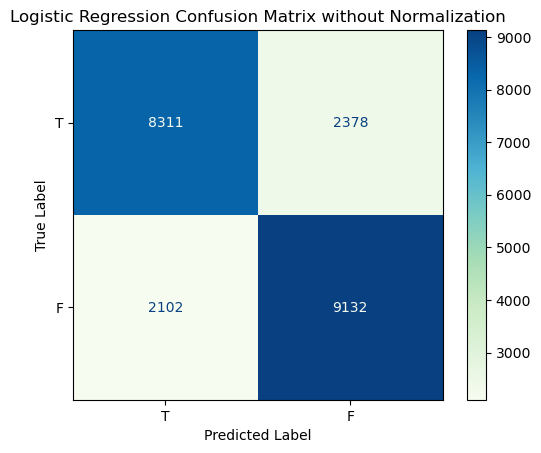

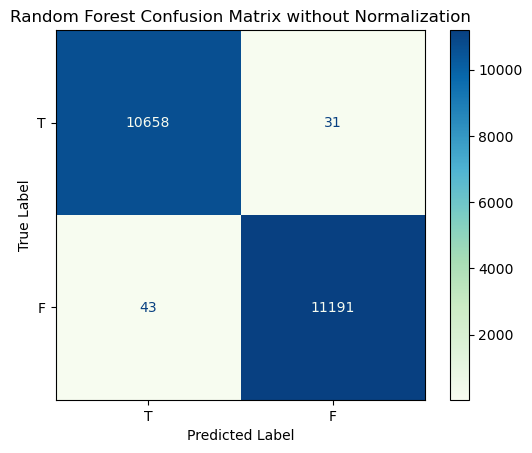

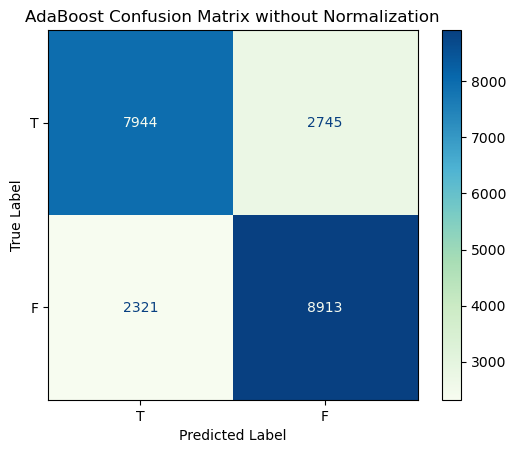

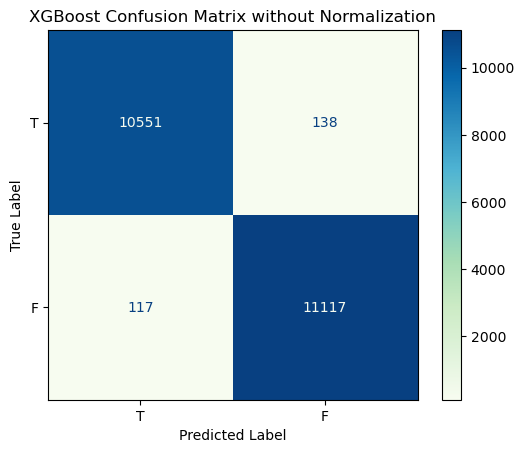

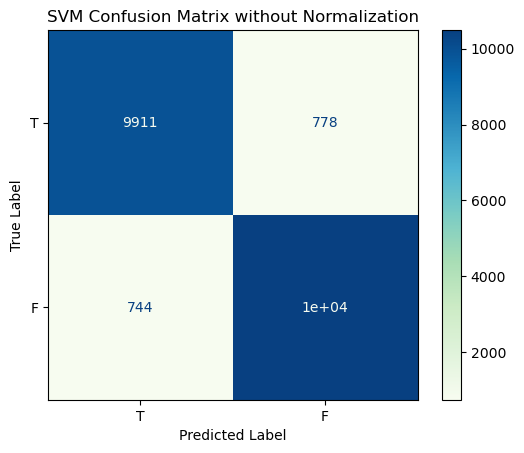

In [195]:
# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp1 = ConfusionMatrixDisplay(
    confusion_matrix=log_reg_cm,
    display_labels= ['T', 'F']
)
disp1.plot(cmap='GnBu')
plt.title("Logistic Regression Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("logreg cm.jpg")
plt.show()

disp2 = ConfusionMatrixDisplay(
    confusion_matrix=random_cm,
    display_labels= ['T', 'F']
)
disp2.plot(cmap='GnBu')
plt.title("Random Forest Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("random cm.jpg")
plt.show()

disp3 = ConfusionMatrixDisplay(
    confusion_matrix=ada_cm,
    display_labels= ['T', 'F']
)
disp3.plot(cmap='GnBu')
plt.title("AdaBoost Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("ada cm.jpg")
plt.show()

disp4 = ConfusionMatrixDisplay(
    confusion_matrix=xgb_cm,
    display_labels= ['T', 'F']
)
disp4.plot(cmap='GnBu')
plt.title("XGBoost Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("xgb cm.jpg")
plt.show()

disp5 = ConfusionMatrixDisplay(
    confusion_matrix=svc_cm,
    display_labels= ['T', 'F']
)
disp5.plot(cmap='GnBu')
plt.title("SVM Confusion Matrix without Normalization")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.savefig("svm cm.jpg")
plt.show()

Normalized Confusion Matrix
[[0.7775 0.2225]
 [0.1871 0.8129]]


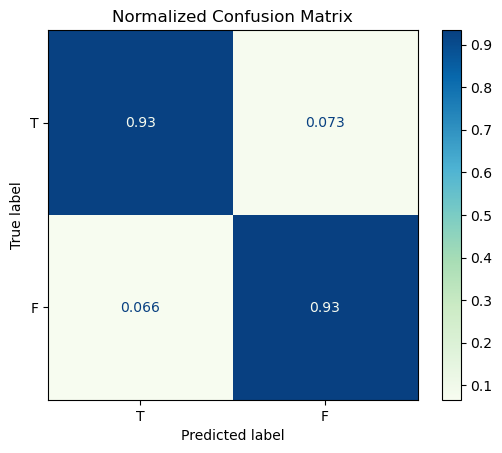

In [196]:
# Normalization of Confusion Matrix (We only show here one normalised confusion matrix, similarly we can show the normalised confusion matrix for other four models)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print("Normalized Confusion Matrix")
np.set_printoptions(precision=4, suppress=True)
print(cm_normalized)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc, normalize='true', display_labels=["T", "F"], cmap='GnBu')
disp.ax_.set_title("Normalized Confusion Matrix")
plt.show()

### Area Under the Curve (AUC)
Area Under the Curve (AUC) is closely related to the (Receiver Operating Characteristic) ROC chart. Both will make use of the data.

In [197]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_random)

# Compute Area Under the Curve (AUC) using the trapezoidal rule (we only show for SVM model, we can also show for the other four models in the similar way)
roc_auc = auc(fpr, tpr)
print(f"Y: {y_test}")
print(f"Y_HAT: {y_pred_random}")
print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print (F"Optimal threshold index: {np.argmax(tpr - fpr)}")
print (F"Optimal threshold value: {thresholds[np.argmax(tpr - fpr)]}")
print(f"AUC: {roc_auc}")

Y: 105412    1
45224     1
205916    0
2115      1
205514    0
         ..
29058     0
178436    0
163039    1
193467    1
93119     1
Name: result, Length: 21923, dtype: int64
Y_HAT: [1 1 0 ... 1 1 1]
FPR: [0.     0.0029 1.    ]
TPR: [0.     0.9962 1.    ]
Optimal threshold index: 1
Optimal threshold value: 1.0
AUC: 0.9966360781166417


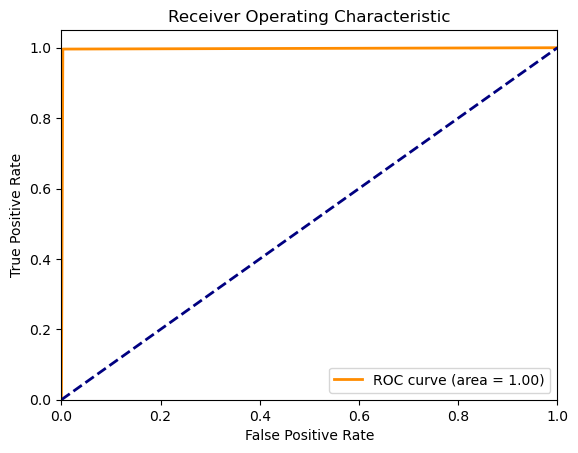

In [198]:
# ROC Curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color = 'darkorange',
         lw = lw, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc = "lower right")
# plt.savefig("svc roc.jpg")
plt.show()

In general, a ROC chart with a large amount of space below the curve is desirable. Below 0.5 is a very bad model and the closer to 1.0 you can go (without overfitting) the better.

In [199]:
X_test

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
105412,Chennai Super Kings,Punjab Kings,Chandigarh,57,62,0,130,7.655172,5.516129
45224,Royal Challengers Bangalore,Delhi Capitals,Delhi,135,107,0,160,12.000000,7.570093
205916,Delhi Capitals,Sunrisers Hyderabad,Delhi,180,104,0,197,6.750000,10.384615
2115,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,22,11,0,214,10.623853,12.000000
205514,Punjab Kings,Lucknow Super Giants,Chandigarh,88,22,0,257,10.408163,24.000000
...,...,...,...,...,...,...,...,...,...
29058,Punjab Kings,Sunrisers Hyderabad,Cuttack,161,108,0,170,5.000000,8.944444
178436,Kolkata Knight Riders,Chennai Super Kings,Dubai,159,97,0,192,8.869565,9.835052
163039,Sunrisers Hyderabad,Mumbai Indians,Mumbai,147,112,1,149,2.250000,7.875000
193467,Gujarat Titans,Chennai Super Kings,Mumbai,47,57,0,133,8.285714,4.947368


In [200]:
print(f"Logistic regression testing: {log_pipe.predict_proba(X_test)[10]}")
print(f"Random Forest testing: {random_pipe.predict_proba(X_test)[10]}")
print(f"AdaBoost testing: {ada_pipe.predict_proba(X_test)[10]}")
print(f"XGBoost testing: {xgb_pipe.predict_proba(X_test)[10]}")
print(f"SVM testing: {svc_pipe.predict_proba(X_test)[10]}")


Logistic regression testing: [0.1803 0.8197]
Random Forest testing: [0.01 0.99]
AdaBoost testing: [0.4836 0.5164]
XGBoost testing: [0.0067 0.9933]
SVM testing: [0.0055 0.9945]


In [201]:
import pickle
pickle.dump(log_pipe,open('log_pipe.pkl','wb'))
pickle.dump(random_pipe,open('random_pipe.pkl','wb'))
pickle.dump(ada_pipe,open('ada_pipe.pkl','wb'))
pickle.dump(xgb_pipe,open('xgb_pipe.pkl','wb'))
pickle.dump(svc_pipe,open('pipe.pkl','wb'))